In [1]:
from osgeo import ogr
import json
import shapely

### Définition de la Géométrie tel que lu dans un fichier Telepac

In [2]:
gml_txt = '''
    <gml:Polygon>
  <gml:outerBoundaryIs>
    <gml:LinearRing>
      <gml:coordinates>
        431244.2409999967,6288499.064 431180.6000000015,6288470.169 431182.1829999983,6288467.179 431086.0469999984,6288411.78 431077.7660000026,6288407.043 431077.0729999989,6288406.589 431088.1410000026,6288388.297 431123.814000003,6288328.955 430978.3769999966,6288249.007 430981.0341000035,6288246.6447 
        430993.439000003,6288229.314 430998.8400000036,6288217.941 431042.109999999,6288233.148 431072.298,6288243.998 431098.248999998,6288253.514 431129.3919999972,6288269.96 431150.1159999967,6288283.984 431166.3659999967,6288298.156 431173.5349999964,6288307.487 431179.5680000037,6288317.047 
        431181.7260000035,6288329.157 431187.512000002,6288336.671 431206.876000002,6288352.985 431232.044,6288365.714 431250.9799999967,6288372.421 431263.699000001,6288373.924 431257.300999999,6288402.467 431256.0230000019,6288414.615 431258.5939999968,6288421.117 431273.873999998,6288427.974 
        431290.1489999965,6288430.587 431302.232000001,6288438.609 431244.9329999983,6288499.398 431244.2409999967,6288499.064 
      </gml:coordinates>
    </gml:LinearRing>
  </gml:outerBoundaryIs>
</gml:Polygon>
'''

gml_txt = '''
   <gml:Polygon>
  <gml:outerBoundaryIs>
    <gml:LinearRing>
      <gml:coordinates>
        425133.3532999977,6289122.005 425092.9160000011,6289154.36 425108.368000001,6289196.578 425154.0719999969,6289187.152 425174.5469999984,6289186.643 425238.1190000027,6289151.216 425260.3730000034,6289143.591 425276.6382,6289139.592 425280.131999999,6289138.733 425279.7885999978,6289136.0967 
        425280.3654000014,6289136.0565 425280.4659999982,6289136.792 425284.3430000022,6289148.998 425287.987999998,6289175.64 425291.5939999968,6289209.485 425288.846000001,6289223.933 425288.526000001,6289240.868 425291.7740999982,6289251.7384 425281.9969,6289258.5567 425276.7229999974,6289239.017 
        425247.883400001,6289257.2399 425194.634199999,6289281.9419 425192.7219000012,6289286.7506 425195.0002000034,6289290.4957 425188.6674999967,6289294.7175 425170.504000001,6289276.555 425152.4870999977,6289255.4966 425106.085000001,6289210.779 425101.6005999967,6289215.8525 425100.9601999968,6289215.5983 
        425099.2089999989,6289194.981 425084.515900001,6289179.0427 425078.9610000029,6289170.268 425080.0332999974,6289157.8746 425084.0178000033,6289141.4383 425071.3170000017,6289126.9942 425077.2938999981,6289113.2972 425079.0371000022,6289101.3435 425061.9139999971,6289100.471 425058.0340000018,6289087.916 
        425066.8343999982,6289083.7865 425074.6789999977,6289074.6967 424973.5522999987,6288968.0364 424974.4184999987,6288960.3491 424989.695600003,6288947.6573 425001.2146999985,6288940.1733 425019.2779999971,6288968.18 425075.695,6288953.181 425102.3060000017,6289043.947 425154.9799999967,6289019.598 
        425147.1010000035,6288966.558 425215.2920000032,6288949.744 425225.7309999987,6288994.631 425233.066200003,6289026.4086 425233.566500001,6289028.5759 425236.0284999982,6289039.242 425236.173,6289039.868 425218.6740000024,6289069.312 425201.6059999987,6289067.394 425137.9003999978,6289118.3667 
        425137.1150999963,6289118.995 425135.7053999975,6289120.123 425133.3532999977,6289122.005 
      </gml:coordinates>
    </gml:LinearRing>
  </gml:outerBoundaryIs>
  <gml:innerBoundaryIs>
    <gml:LinearRing>
      <gml:coordinates>
        425156.3585999981,6289207.1013 425135.5450000018,6289211.3939 425166.3654000014,6289241.0955 425167.6841000021,6289242.4946 425185.1955000013,6289262.9622 425186.1008,6289263.8674 425186.2177999988,6289263.799 425238.2934999987,6289239.6414 425266.0396,6289222.1094 425269.1643999964,6289220.5222 
        425269.1982000023,6289220.196 425271.3927000016,6289208.6582 425268.1322000027,6289178.0555 425266.0438999981,6289162.7923 425266.0130999982,6289162.7999 425246.293099999,6289169.5567 425184.2827999964,6289204.1134 425179.8166999966,6289205.9363 425175.044,6289206.6368 425156.3585999981,6289207.1013 
      </gml:coordinates>
    </gml:LinearRing>
  </gml:innerBoundaryIs>
  <gml:innerBoundaryIs>
    <gml:LinearRing>
      <gml:coordinates>
        425214.8807,6289036.5478 425206.2471000031,6288999.1453 425200.4025999978,6288974.0143 425169.5578999966,6288981.6198 425174.7629000023,6289016.6593 425174.9668999985,6289020.3206 425174.498999998,6289023.9577 425173.375,6289027.4482 425171.6325,6289030.6748 425169.3302000016,6289033.529 
        425166.5455000028,6289035.9149 425163.3719,6289037.7522 425110.6978999972,6289062.1012 425107.0997999981,6289063.364 425103.3272999972,6289063.9209 425099.5178000033,6289063.7517 425095.8095000014,6289062.8625 425092.3374999985,6289061.2857 425089.2278999984,6289059.0785 425086.593699999,6289056.3213 
        425084.5305999964,6289053.1142 425083.1137999967,6289049.5738 425061.9887999967,6288977.5197 425024.4166999981,6288987.5086 425020.2818000019,6288988.1548 425020.182099998,6288988.1493 425089.1925999969,6289060.9361 425091.7435000017,6289064.2658 425093.5437000021,6289068.0543 425094.5143000036,6289072.1349 
        425094.6123000011,6289076.3283 425093.8337000012,6289080.4498 425092.2124999985,6289084.3184 425091.3258000016,6289085.5953 425091.537799999,6289085.7315 425094.4934,6289088.6508 425096.782099999,6289092.1177 425098.3052999973,6289095.9826 425098.9971000031,6289100.0789 425098.8277999982,6289104.2297 
        425097.0845,6289116.1834 425095.6247000024,6289121.2961 425094.7339000031,6289123.3375 425096.774700001,6289125.6584 425189.1109,6289051.7776 425192.4034999982,6289049.6369 425196.0508999974,6289048.181 425199.9125000015,6289047.4658 425203.839400001,6289047.5191 425208.0772999972,6289047.9953 
        425214.8807,6289036.5478 
      </gml:coordinates>
    </gml:LinearRing>
  </gml:innerBoundaryIs>
</gml:Polygon>
'''

### Lecture avec gdal / ogr

In [5]:
g = ogr.CreateGeometryFromGML(gml_txt)

### Vérification de la géométrie

In [ ]:
print(json.loads(g.ExportToJson()))
print(json.loads(g.ExportToJson())['coordinates'])

coord = json.loads(g.ExportToJson())['coordinates']
for l in coord:
    print(len(l))

{'type': 'Polygon', 'coordinates': [[[425133.3532999977, 6289122.005], [425092.9160000011, 6289154.36], [425108.368000001, 6289196.578], [425154.0719999969, 6289187.152], [425174.5469999984, 6289186.643], [425238.1190000027, 6289151.216], [425260.3730000034, 6289143.591], [425276.6382, 6289139.592], [425280.131999999, 6289138.733], [425279.7885999978, 6289136.0967], [425280.3654000014, 6289136.0565], [425280.4659999982, 6289136.792], [425284.3430000022, 6289148.998], [425287.987999998, 6289175.64], [425291.5939999968, 6289209.485], [425288.846000001, 6289223.933], [425288.526000001, 6289240.868], [425291.7740999982, 6289251.7384], [425281.9969, 6289258.5567], [425276.7229999974, 6289239.017], [425247.883400001, 6289257.2399], [425194.634199999, 6289281.9419], [425192.7219000012, 6289286.7506], [425195.0002000034, 6289290.4957], [425188.6674999967, 6289294.7175], [425170.504000001, 6289276.555], [425152.4870999977, 6289255.4966], [425106.085000001, 6289210.779], [425101.6005999967, 6289

### Affichage de la géométrie

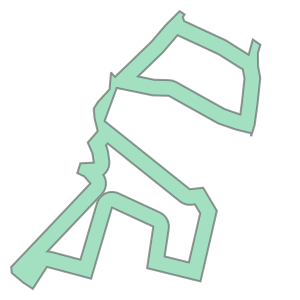

In [ ]:
shapely.geometry.shape(json.loads(g.ExportToJson()))